In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

import struct

from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import LabelBinarizer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion

from sklearn.model_selection import train_test_split

# Get the data

In [2]:
def load_csv(path):
    return pd.read_csv(path)

In [3]:
training_raw = load_csv("data/train_V2_copia.csv")

In [4]:
training_raw.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [5]:
training_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220216 entries, 0 to 220215
Data columns (total 29 columns):
Id                 220216 non-null object
groupId            220216 non-null object
matchId            220216 non-null object
assists            220216 non-null int64
boosts             220216 non-null int64
damageDealt        220216 non-null float64
DBNOs              220216 non-null int64
headshotKills      220216 non-null int64
heals              220216 non-null int64
killPlace          220216 non-null int64
killPoints         220216 non-null int64
kills              220216 non-null int64
killStreaks        220216 non-null int64
longestKill        220216 non-null float64
matchDuration      220216 non-null int64
matchType          220216 non-null object
maxPlace           220216 non-null int64
numGroups          220216 non-null int64
rankPoints         220216 non-null int64
revives            220216 non-null int64
rideDistance       220216 non-null float64
roadKills         

We have to format the three first attributes because of theses strings can't be used to fit the model.

In [6]:
training_format = training_raw.copy()

In [7]:
training_format["Id"] = np.arange(len(training_format))
training_format["groupId"] = np.arange(len(training_format))
training_format["matchId"] = np.arange(len(training_format))

In [8]:
training_raw.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,220216.000000,220216.000000,220216.000000,220216.000000,220216.000000,220216.000000,220216.000000,220216.000000,220216.000000,220216.000000,...,220216.000000,220216.000000,220216.000000,220216.000000,220216.000000,220216.000000,220216.000000,220216.000000,220216.000000,220216.000000
mean,0.232858,1.113153,130.920473,0.657159,0.226151,1.368788,47.607417,506.440495,0.926595,0.544570,...,0.163290,602.564687,0.003701,4.558532,0.023486,0.007520,1156.380998,3.672903,608.501857,0.472838
std,0.589536,1.723522,171.673314,1.148812,0.600173,2.665566,27.472573,627.540576,1.563712,0.712567,...,0.466527,1484.673601,0.080414,30.883989,0.165181,0.090046,1184.322981,2.468826,740.098821,0.307505
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,155.475000,2.000000,0.000000,0.200000
50%,0.000000,0.000000,84.170000,0.000000,0.000000,0.000000,47.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,690.500000,3.000000,0.000000,0.458300
75%,0.000000,2.000000,186.000000,1.000000,0.000000,2.000000,71.000000,1172.000000,1.000000,1.000000,...,0.000000,0.032875,0.000000,0.000000,0.000000,0.000000,1978.000000,5.000000,1495.000000,0.740700
max,21.000000,21.000000,5479.000000,32.000000,40.000000,52.000000,100.000000,2152.000000,48.000000,14.000000,...,16.000000,28450.000000,8.000000,2295.000000,5.000000,4.000000,13530.000000,72.000000,1972.000000,1.000000


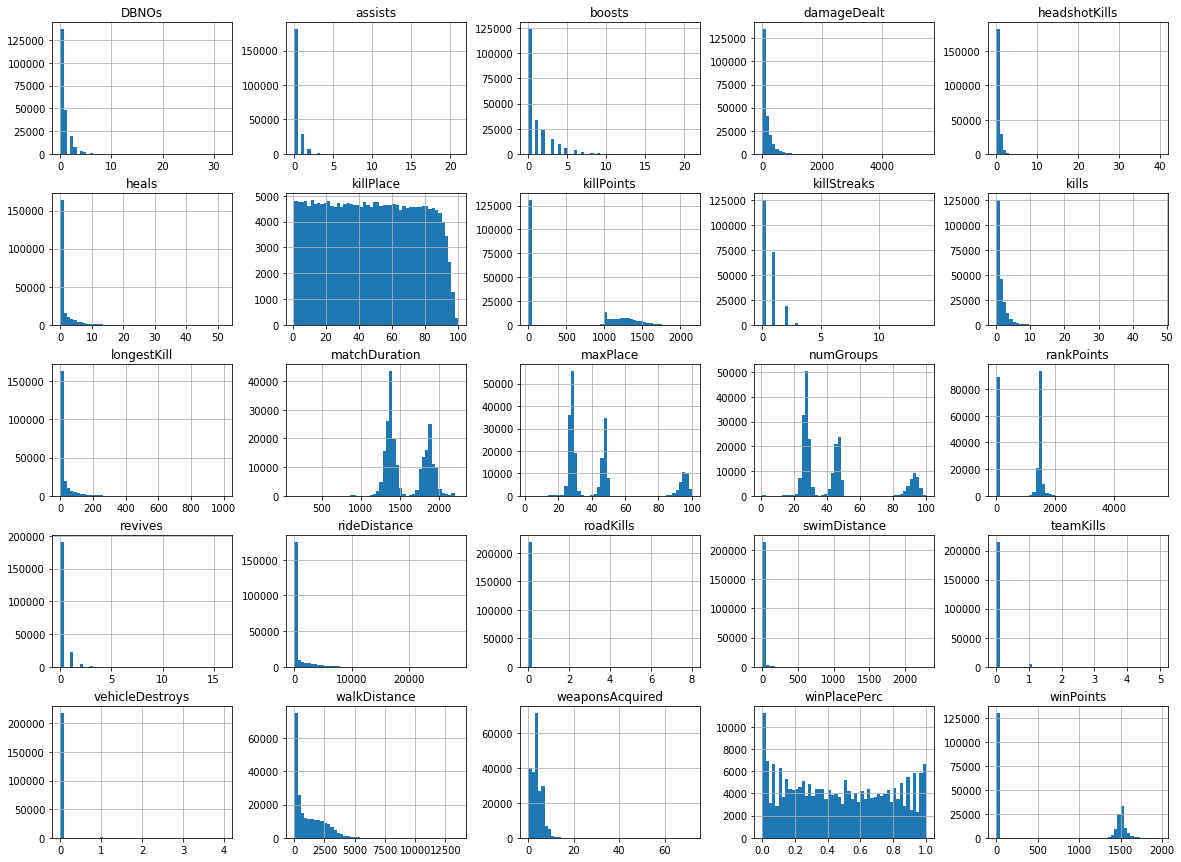

In [9]:
%matplotlib inline
training_raw.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
#training_format["killPlaceAVG"] = training_format["killPlace"].mean()
#training_format["overallKills"] = 
#training_format["overallDBNOS"] = 
#training_format["overallMatches"] = 

### Create test set

In [11]:
train_set, test_set = train_test_split(training_format, test_size=0.2, random_state=42)

In [12]:
print(f'Training data: {train_set.shape}\nTest data: {test_set.shape}')

Training data: (176172, 29)
Test data: (44044, 29)


# Discover and visualize the data to gain insights

### Looking for Correlations

In [13]:
training_copy = train_set.copy()

In [14]:
corr_matrix = training_copy.corr()

In [15]:
corr_matrix["winPlacePerc"].sort_values(ascending=False)

winPlacePerc       1.000000
walkDistance       0.810468
boosts             0.634709
weaponsAcquired    0.583939
damageDealt        0.440353
heals              0.429185
kills              0.418574
longestKill        0.410220
killStreaks        0.375582
rideDistance       0.343796
assists            0.298242
DBNOs              0.278878
headshotKills      0.276485
revives            0.236683
swimDistance       0.148286
vehicleDestroys    0.071062
numGroups          0.043024
maxPlace           0.040761
roadKills          0.031502
killPoints         0.014727
teamKills          0.014676
rankPoints         0.011451
winPoints          0.009472
groupId           -0.001959
matchId           -0.001959
Id                -0.001959
matchDuration     -0.002536
killPlace         -0.718375
Name: winPlacePerc, dtype: float64

##### Attributes that seem more correlated with "winPlacePerc" are:
walkDistance   
killPlace
boosts             
weaponsAcquired    
damageDealt        
heals              
kills 
longestKill       
killStreaks       
rideDistance     
assists           
DBNOs           
headshotKills   
revives

In [16]:
attributes = ["winPlacePerc", "walkDistance", "killPlace",
"boosts"]

scatter_matrix(training_copy[attributes], figsize=(12, 8))

In [17]:
training_copy.plot(kind="scatter", x="walkDistance", y="winPlacePerc",alpha=0.1)

In [18]:
training_copy.plot(kind="scatter", x="matchDuration", y="winPlacePerc",alpha=0.1)

# Prepare the data for Machine Learning algorithms

### Pipelines

In [20]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [21]:
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)

In [22]:
train = train_set.drop("winPlacePerc", axis=1)
train_labels = train_set["winPlacePerc"].copy()

In [23]:
test = test_set.drop("winPlacePerc", axis=1)
test_labels = test_set["winPlacePerc"].copy()

In [24]:
train_set = train_set.drop("winPlacePerc", axis=1)
test_set = test_set.drop("winPlacePerc", axis=1)

In [25]:
num_attribs = list(train_set.drop("matchType", axis=1))
cat_attribs = ["matchType"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('std_scaler', StandardScaler()),
    ])
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('label_binarizer', MyLabelBinarizer()),
    ])

In [26]:
full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [27]:
PUBG_TRAIN = full_pipeline.fit_transform(train)
PUBG_TEST = full_pipeline.fit_transform(test)

# Select a model and train it

In [28]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(PUBG_TRAIN, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
PUBG_predictions = lin_reg.predict(PUBG_TEST)
lin_mse = mean_squared_error(test_labels, PUBG_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.12290934818000988

In [31]:
lin_scores = cross_val_score(lin_reg, PUBG_TEST, test_labels,
scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.12238582 0.12495374 0.12137926 0.12179904 0.12466506 0.12658951
 0.11923636 0.12361105 0.1214505  0.12298918]
Mean: 0.1229059519474683
Standard deviation: 0.0020191940028456436


In [32]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(PUBG_TRAIN, train_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [33]:
PUBG_predictions = tree_reg.predict(PUBG_TEST)
tree_mse = mean_squared_error(test_labels, PUBG_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.1259032412979908

In [34]:
tree_scores = cross_val_score(tree_reg, PUBG_TEST, test_labels,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)

Scores: [0.13369745 0.13356272 0.12937896 0.12744199 0.13562613 0.13431025
 0.12798968 0.13075636 0.12759739 0.1319954 ]
Mean: 0.13123563282188505
Standard deviation: 0.0028744480308468497


In [35]:
forest_reg = RandomForestRegressor()
forest_reg.fit(PUBG_TRAIN, train_labels)

/home/enrique/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [37]:
PUBG_predictions = forest_reg.predict(PUBG_TEST)
forest_mse = mean_squared_error(test_labels, PUBG_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.09233640450150536

In [38]:
forest_scores = cross_val_score(forest_reg, PUBG_TEST, test_labels,
scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.09950568 0.0971045  0.0954446  0.09452823 0.09906359 0.09564412
 0.0996739  0.09655934 0.0944611  0.0981426 ]
Mean: 0.09701276436249953
Standard deviation: 0.001897602589004982


In [39]:
reg = linear_model.HuberRegressor()

In [40]:
reg.fit(PUBG_TRAIN, train_labels)

HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)

In [41]:
PUBG_predictions = reg.predict(PUBG_TEST)
mse = mean_squared_error(test_labels, PUBG_predictions)
rmse = np.sqrt(mse)
rmse

0.123299910757742

In [42]:
scores = cross_val_score(reg, PUBG_TEST, test_labels,
scoring="neg_mean_squared_error", cv=10)
scores = np.sqrt(-scores)
display_scores(scores)

Scores: [0.12286013 0.12600877 0.12180806 0.12210718 0.12514367 0.12709058
 0.11962381 0.12376492 0.1218233  0.12350663]
Mean: 0.12337370557930952
Standard deviation: 0.0021177058290849115


# Fine-tune your model

# Present your solution

# Launch, monitor, and maintain your system